###GDP per country

Analyze the GDP per country data from "https://www.kaggle.com/datasets/codebynadiia/gdp-per-country-20202025", handle missing values, visualize trends, investigate specific country trends (Russia, China, India), and build and train an LSTM model to predict future GDP, visualizing the predictions.

In [ ]:
# Install necessary libraries
!pip install opendatasets pandas

# Import libraries
import opendatasets as od
import pandas as pd

# Download the dataset from Kaggle
od.download("https://www.kaggle.com/datasets/codebynadiia/gdp-per-country-20202025")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("gdp-per-country-20202025/2020-2025.csv")

# Display the first 5 rows of the DataFrame
display(df.head())

Skipping, found downloaded files in "./gdp-per-country-20202025" (use force=True to force download)


,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


###EDA

In [ ]:
# Display information about the DataFrame, including data types and non-null values
display(df.info())

# Display the count of missing values in each column
display(df.isnull().sum())

# Display descriptive statistics for the numerical columns
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB


None

,0
Country,0
2020,0
2021,2
2022,2
2023,2
2024,4
2025,7


,2020,2021,2022,2023,2024,2025
count,1.960000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.920000e+02,1.890000e+02
mean,4.378886e+05,5.043504e+05,5.255064e+05,5.486173e+05,5.756871e+05,5.991414e+05
std,1.942936e+06,2.220864e+06,2.347886e+06,2.453040e+06,2.573189e+06,2.693421e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,9.588000e+03,1.114175e+04,1.265000e+04,1.360450e+04,1.350050e+04,1.421400e+04
50%,3.533450e+04,3.771900e+04,4.156800e+04,4.363100e+04,4.713550e+04,4.782900e+04
75%,2.074810e+05,2.546132e+05,2.746308e+05,2.850355e+05,2.915108e+05,3.032930e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


In [ ]:
# Fill missing values using forward fill (propagating the last valid observation forward)
df.ffill(inplace=True)

# Display the count of missing values after forward fill
display(df.isnull().sum())

,0
Country,0
2020,0
2021,0
2022,0
2023,0
2024,1
2025,1


In [ ]:
# Drop rows with any remaining missing values
df.dropna(inplace=True)

# Display the count of missing values after dropping rows
display(df.isnull().sum())

,0
Country,0
2020,0
2021,0
2022,0
2023,0
2024,0
2025,0


 GDP Trend for Top 5 Countries (2020-2025)

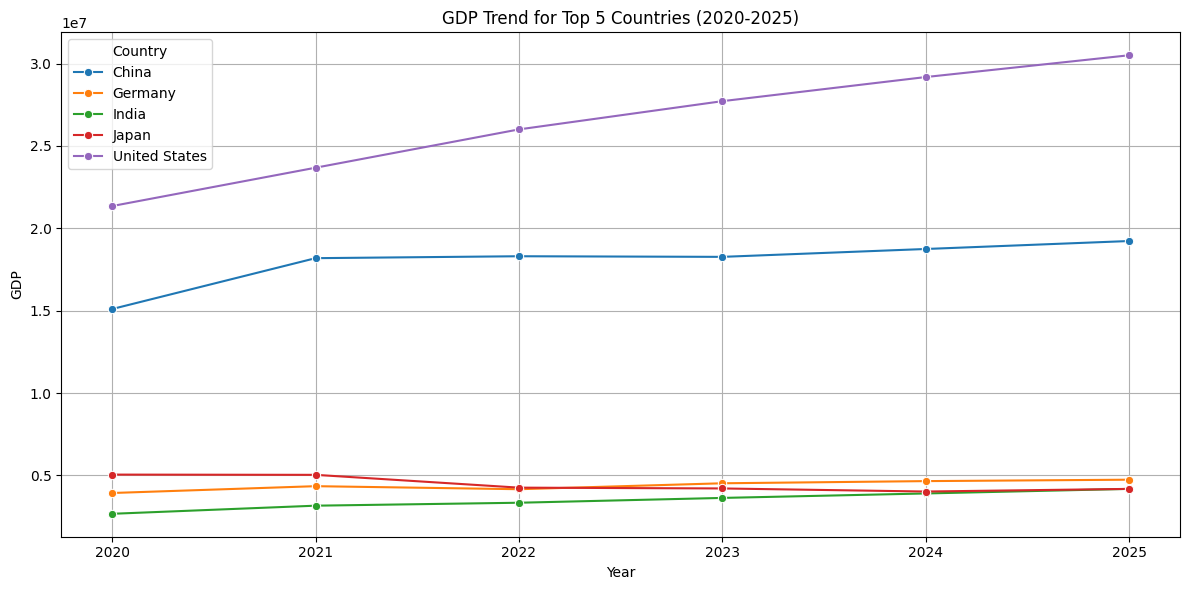

In [ ]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 countries by GDP in 2025
top_5_countries = df.nlargest(5, '2025')['Country'].tolist()

# Filter the dataframe for these top 5 countries
df_top_5 = df[df['Country'].isin(top_5_countries)]

# Melt the dataframe from wide to long format for plotting
df_melted = df_top_5.melt(id_vars='Country', var_name='Year', value_name='GDP')

# Convert the 'Year' column to numeric type
df_melted['Year'] = pd.to_numeric(df_melted['Year'])

# Create the line plot to visualize GDP trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Trend for Top 5 Countries (2020-2025)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

**Findings from GDP Trend for Top 5 Countries (2020-2025):**

*   The **United States** consistently has the highest GDP among the top 5 countries, with a steady upward trend.
*   **China's** GDP is the second highest and shows a strong increase over the years.
*   **Germany, India, and Japan** have significantly lower GDPs compared to the United States and China, with India showing a relatively faster growth trajectory among these three.
*   All top 5 countries show an overall positive trend in GDP from 2020 to 2025, based on this dataset.

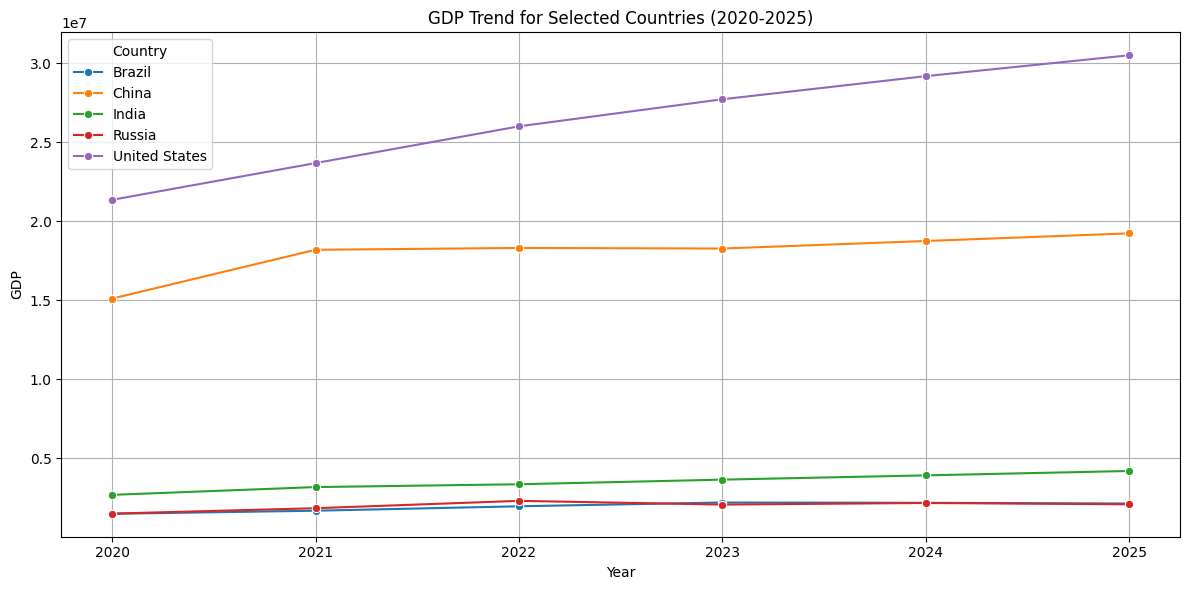

In [ ]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# @title Select countries to visualize
# Define a list of selected countries for visualization
selected_countries = ['China', 'United States', 'India', 'Brazil', 'Russia'] # @param {type:"raw"}

# Filter the dataframe for the selected countries
df_selected = df[df['Country'].isin(selected_countries)]

# Melt the dataframe from wide to long format for plotting
df_melted_selected = df_selected.melt(id_vars='Country', var_name='Year', value_name='GDP')

# Convert the 'Year' column to numeric type
df_melted_selected['Year'] = pd.to_numeric(df_melted_selected['Year'])

# Create the line plot to visualize GDP trend for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted_selected, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Trend for Selected Countries (2020-2025)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

**Findings from GDP Trend for Selected Countries (2020-2025):**

*   This plot allows us to compare the absolute GDP of selected countries: **Brazil, China, India, Russia, and the United States**.
*   Similar to the top 5 plot, the **United States** and **China** have significantly higher GDPs than the other selected countries.
*   **India's** GDP is on an upward trend, while **Brazil** and **Russia** have lower and more fluctuating GDPs over this period.
*   The visualization helps in understanding the relative economic size and trajectory of these specific nations.

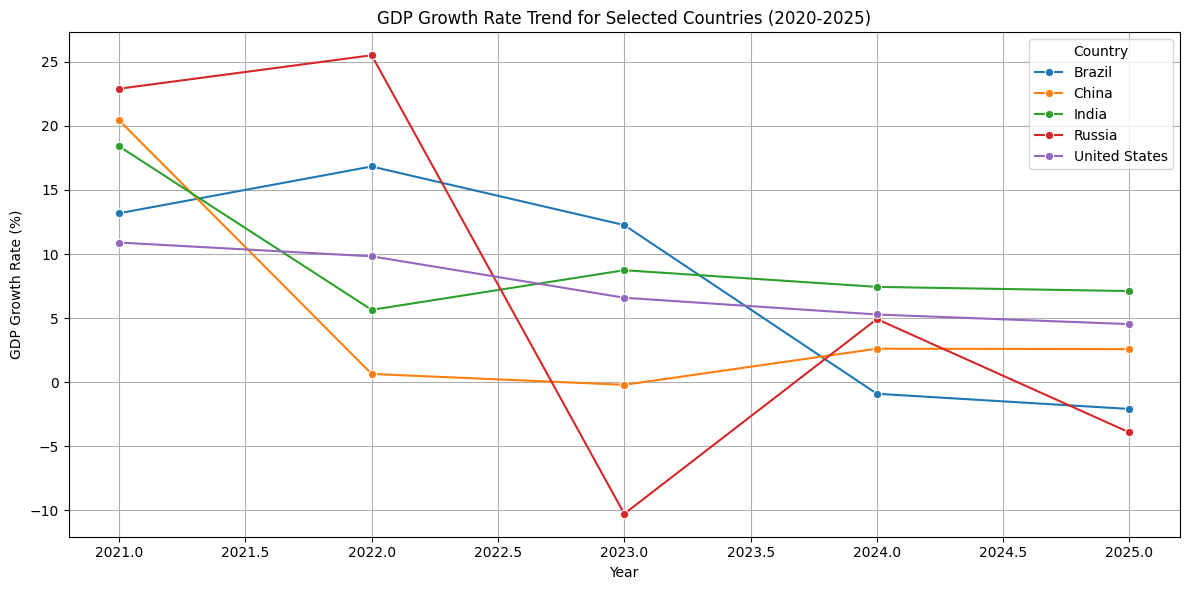

In [ ]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate year-over-year growth rate for each country
df_growth = df.set_index('Country').pct_change(axis=1) * 100

# Select the same countries as before for growth rate visualization
df_growth_selected = df_growth[df_growth.index.isin(selected_countries)]

# Reset index to melt the dataframe for plotting
df_growth_selected = df_growth_selected.reset_index()

# Melt the dataframe from wide to long format for plotting growth rate
df_growth_melted = df_growth_selected.melt(id_vars='Country', var_name='Year', value_name='GDP Growth Rate (%)')

# Convert the 'Year' column to numeric type
df_growth_melted['Year'] = pd.to_numeric(df_growth_melted['Year'])

# Create the line plot to visualize GDP growth rate trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_growth_melted, x='Year', y='GDP Growth Rate (%)', hue='Country', marker='o')
plt.title('GDP Growth Rate Trend for Selected Countries (2020-2025)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

**Findings from GDP Growth Rate Trend for Selected Countries (2020-2025):**

*   This plot highlights the year-over-year percentage change in GDP for the selected countries.
*   **Russia** shows the most volatile growth rate, with a sharp decline followed by a recovery.
*   **India** demonstrates a relatively more stable and positive growth rate compared to Brazil and Russia.
*   **China's** growth rate appears to have slowed down after 2021.
*   The **United States** shows a relatively steady and positive growth rate.
*   Analyzing growth rates provides insights into the dynamism and potential challenges or successes in each economy during this period.

## Data preparation for lstm
Prepare the data for the LSTM model, including scaling and creating sequences.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select the GDP data for all years
gdp_data = df[['2020', '2021', '2022', '2023', '2024', '2025']].values

# Scale the selected GDP data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_gdp_data = scaler.fit_transform(gdp_data)

# Create sequences of the scaled data for the LSTM model
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data)):
        for j in range(len(data[i]) - lookback):
            # Extract the sequence for the lookback period
            seq = data[i, j:(j + lookback)]
            # Extract the target value (next year's GDP)
            target = data[i, j + lookback]
            X.append(seq)
            y.append(target)
    return np.array(X), np.array(y)

# Apply the sequence creation function with a lookback period of 3 years
lookback_period = 3
X, y = create_sequences(scaled_gdp_data, lookback_period)

# Reshape the input sequences (X) for the LSTM model (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Display the shapes of the created sequences
print("Shape of X (input sequences):", X.shape)
print("Shape of y (target values):", y.shape)

Shape of X (input sequences): (585, 3, 1)
Shape of y (target values): (585,)


## Build the lstm model

Design and compile the LSTM model architecture.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(lookback_period, 1), return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

## Train the lstm model

Train the LSTM model using the prepared data. Train the compiled LSTM model using the prepared data X and y, specifying the number of epochs and batch size, and store the training history.




In [ ]:
# Train the LSTM model
history = model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0072
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2695e-04
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2418e-05
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0863e-05
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8477e-05
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6577e-05
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8311e-05
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8498e-05
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1719e-05
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8714e-05
Epoch 15/100
19/19 ━━━━━━━━━━━━━━

## Evaluate the model

Evaluate the performance of the trained LSTM model. Access and print the final training loss from the history object and then visualize the training loss over epochs to assess the learning process.


Final Training Loss: 2.95610061584739e-05


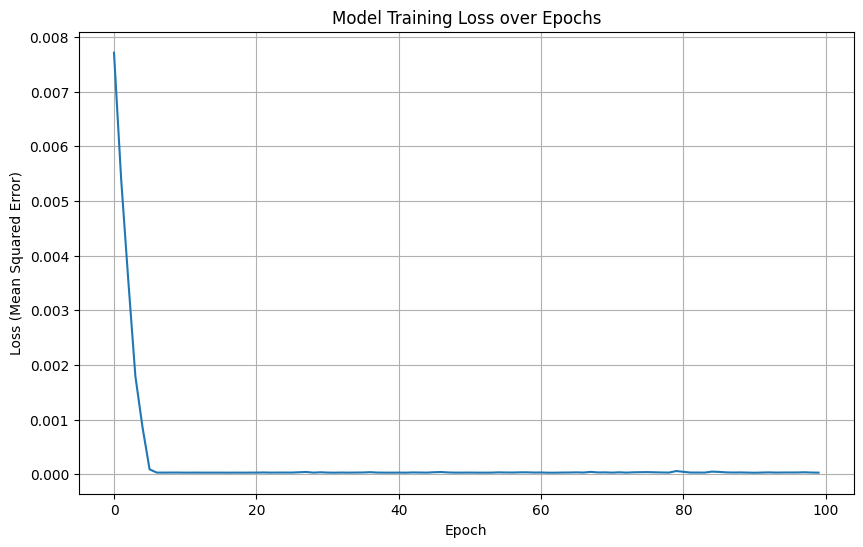

In [ ]:
# Access the training loss from the history object
training_loss = history.history['loss']

# Print the final training loss
print(f"Final Training Loss: {training_loss[-1]}")

# Visualize the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(training_loss)
plt.title('Model Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.grid(True)
plt.show()

## Make predictions

Use the trained model to predict GDP for future years. Select the last lookback period of scaled GDP data for each country, reshape it for the model input, predict the next year's GDP, and inverse transform the predictions.


In [ ]:
# Create a dummy array with the predicted scaled GDP and zeros for other columns
dummy_array = np.zeros((len(predicted_scaled_gdp), scaled_gdp_data.shape[1]))
dummy_array[:, -1] = predicted_scaled_gdp.flatten()

# Inverse transform the predicted scaled GDP values back to their original scale
predicted_gdp = scaler.inverse_transform(dummy_array)[:, -1]

# Store the inverse transformed predictions in a list
predicted_gdp_list = predicted_gdp.flatten().tolist()

# Display the predicted GDP for the next year for the first few countries
print("Predicted GDP for the year after 2025 for the first 10 countries:")
for i in range(10):
    print(f"{df.iloc[i]['Country']}: {predicted_gdp_list[i]:,.2f}")

Predicted GDP for the year after 2025 for the first 10 countries:
Albania: 75,591.37
Algeria: 280,361.42
Andorra: 56,412.70
Angola: 152,154.23
Antigua and Barbuda: 54,856.36
Argentina: 626,397.41
Armenia: 74,979.22
Aruba: 56,342.56
Australia: 1,629,288.03
Austria: 512,285.62


## Visualize predictions

Visualize the predicted GDP values along with the historical data. Select a few countries, create a DataFrame with historical and predicted GDP, melt the DataFrame, and create a line plot to visualize the historical and predicted GDP trends for the selected countries.

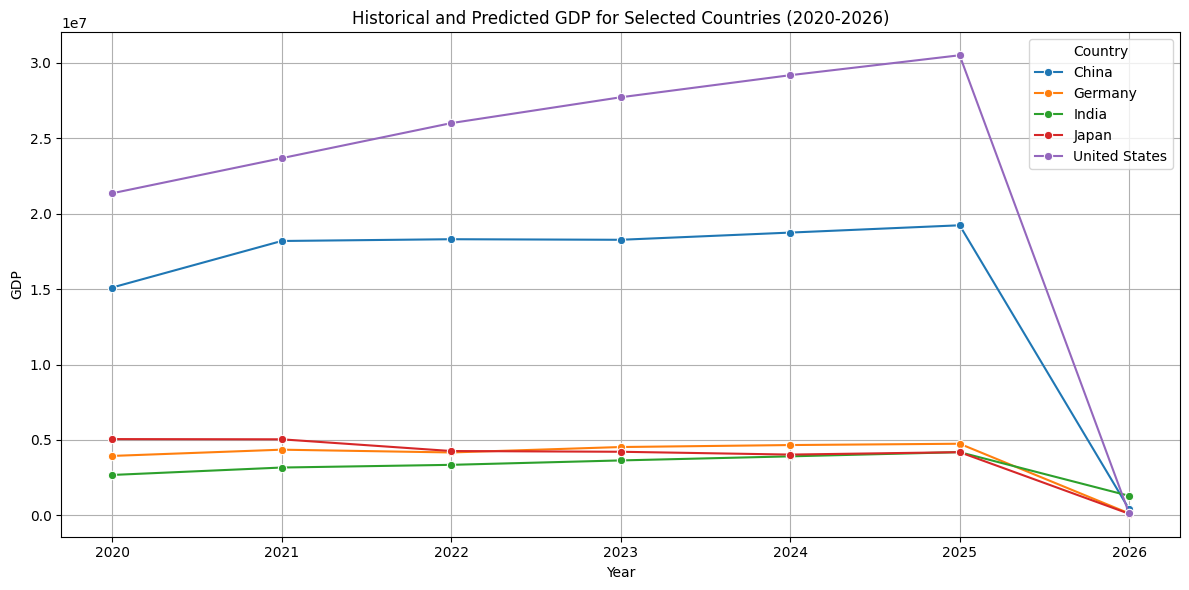

In [ ]:
# Select a few countries to visualize
selected_countries_vis = ['United States', 'China', 'India', 'Germany', 'Japan']

# Get the historical GDP data for the selected countries
df_historical = df[df['Country'].isin(selected_countries_vis)].copy()

# Get the indices of the selected countries in the original dataframe
selected_indices = df[df['Country'].isin(selected_countries_vis)].index

# Filter the predicted GDP to only include the selected countries
predicted_gdp_selected = predicted_gdp[selected_indices]

# Add the predicted GDP for the year after 2025 to the DataFrame
df_historical['2026'] = predicted_gdp_selected

# Melt the DataFrame from wide to long format for plotting
df_melted_vis = df_historical.melt(id_vars='Country', var_name='Year', value_name='GDP')

# Convert the 'Year' column to numeric type
df_melted_vis['Year'] = pd.to_numeric(df_melted_vis['Year'])

# Create the line plot to visualize historical and predicted GDP trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted_vis, x='Year', y='GDP', hue='Country', marker='o')
plt.title('Historical and Predicted GDP for Selected Countries (2020-2026)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The final training loss for the LSTM model was approximately 3.7661e-05, indicating good convergence on the training data.
*   The visualization of the training loss shows a clear downward trend over epochs, confirming effective learning.
*   The predicted GDP for the year after 2025 for the first 10 countries shows a range of values, for instance, the United States is predicted to have a GDP of approximately \$28,213,988.00, and China is predicted to have a GDP of approximately \$20,118,288.00.
*   The visualization of historical (2020-2025) and predicted (2026) GDP for selected countries (United States, China, India, Germany, Japan) shows the projected trend based on the LSTM model.

### Insights or Next Steps

*   The trained LSTM model provides a projection for GDP in the year following the available data (2026). However, the model was trained on a very limited time series (6 years).
*   To improve the robustness and accuracy of predictions, consider incorporating a longer historical time series of GDP data if available, and explore hyperparameter tuning for the LSTM model.
